In [1]:
import os
import glob
import xarray as xr
import matplotlib

## List all data files

In [2]:
data_path = '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/'
file_list = glob.glob(data_path + '*.raw')
file_list.sort()
file_list

['/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T000000.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T013841.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T031743.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T045644.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T063550.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T081451.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T095354.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T113306.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T131207.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T145109.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T163010.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T180922.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T194823.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T212724.raw',
 '/Volumes/wjlee_apl

In [3]:
# Files from Aug 21, 2017 local time
file_list[19:35]

['/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T063618.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T081522.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T095435.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T113343.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T131245.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T145147.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T163049.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T180952.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T194853.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T212802.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T230706.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T000000.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T013902.raw',
 '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T031804.raw',
 '/Volumes/wjlee_apl

## Convert EK60 ``.raw`` to ``.nc`` files

In [4]:
from echopype.convert import ConvertEK60

In [5]:
# for fname in file_list[19:35]:
for fname in file_list:
    data_tmp = ConvertEK60(fname)
    data_tmp.raw2nc()

01:28:59  converting file: OOI-D20170820-T000000.raw
          ... this file has already been converted to .nc, conversion not executed.
01:29:00  converting file: OOI-D20170820-T013841.raw
          ... this file has already been converted to .nc, conversion not executed.
01:29:02  converting file: OOI-D20170820-T031743.raw
01:29:06  converting file: OOI-D20170820-T045644.raw
01:29:10  converting file: OOI-D20170820-T063550.raw
01:29:13  converting file: OOI-D20170820-T081451.raw
01:29:17  converting file: OOI-D20170820-T095354.raw
01:29:20  converting file: OOI-D20170820-T113306.raw
01:29:24  converting file: OOI-D20170820-T131207.raw
01:29:28  converting file: OOI-D20170820-T145109.raw
01:29:31  converting file: OOI-D20170820-T163010.raw
01:29:35  converting file: OOI-D20170820-T180922.raw
01:29:38  converting file: OOI-D20170820-T194823.raw
01:29:42  converting file: OOI-D20170820-T212724.raw
01:29:45  converting file: OOI-D20170820-T230626.raw
01:29:47  converting file: OOI-D20170

## Calibrate data, denoise, and calculate MVBS

In [6]:
from echopype.model import EchoDataEK60

In [7]:
# for fname in file_list[19:35]:
for fname in file_list:
    data = EchoDataEK60(fname[:-4]+'.nc')
    data.MVBS_ping_size = 30
    data.MVBS_range_bin_size = 2.5
    data.calibrate(save=True,)  # Calibration and echo-integration
    data.remove_noise(save=True)  # Save denoised Sv to FILENAME_Sv_clean.nc
    data.get_MVBS(save=True)
    os.remove(fname[:-4]+'_Sv.nc')

01:31:08  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T000000_Sv.nc
01:31:21  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T000000_Sv_clean.nc
01:31:24  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T000000_MVBS.nc
01:31:27  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T013841_Sv.nc
01:31:40  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T013841_Sv_clean.nc
01:31:42  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T013841_MVBS.nc
01:31:45  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T031743_Sv.nc
01:32:01  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T031743_Sv_clean.nc
01:32:04  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T031743_MVBS.nc
01:32:07  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170820-T04

01:40:40  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T194853_Sv_clean.nc
01:40:43  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T194853_MVBS.nc
01:40:46  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T212802_Sv.nc
01:40:58  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T212802_Sv_clean.nc
01:41:02  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T212802_MVBS.nc
01:41:03  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T230706_Sv.nc
01:41:09  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T230706_Sv_clean.nc
01:41:10  saving MVBS to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170821-T230706_MVBS.nc
01:41:13  saving calibrated Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T000000_Sv.nc
01:41:27  saving denoised Sv to /Volumes/wjlee_apl_2/z_ooi_eclipse_data/OOI-D20170822-T0000

## Opening and Visualizing the Results in Parallel

In [4]:
import xarray as xr

In [5]:
data_path = '/Volumes/wjlee_apl_2/z_ooi_eclipse_data/'

In [6]:
res = xr.open_mfdataset(data_path+'*MVBS.nc')

In [7]:
res

<xarray.Dataset>
Dimensions:                   (frequency: 3, ping_time: 8606, range_bin: 83)
Coordinates:
  * frequency                 (frequency) float32 120000.0 38000.0 200000.0
  * range_bin                 (range_bin) int64 0 13 26 39 ... 1040 1053 1066
  * ping_time                 (ping_time) datetime64[ns] 2017-08-20T00:00:00.053000192 ... 2017-08-22T23:54:51.027999744
Data variables:
    MVBS                      (frequency, ping_time, range_bin) float64 dask.array<shape=(3, 8606, 83), chunksize=(3, 198, 83)>
    noise_est_range_bin_size  (ping_time, frequency) float32 dask.array<shape=(8606, 3), chunksize=(198, 3)>
    sample_thickness          (ping_time, frequency) float32 dask.array<shape=(8606, 3), chunksize=(198, 3)>
Attributes:
    noise_est_ping_size:  30

In [8]:
import matplotlib.pyplot as plt

In [9]:
res.coords['depth'] = res.range_bin * res.sample_thickness.sel(frequency=200000).isel(ping_time=0).values
res.coords['depth'] = res.coords['depth'].max() - res.coords['depth']

In [29]:
res.MVBS.sel(frequency=200000)

<xarray.DataArray 'MVBS' (ping_time: 8606, range_bin: 83)>
dask.array<shape=(8606, 83), dtype=float64, chunksize=(198, 83)>
Coordinates:
    frequency  float32 200000.0
  * range_bin  (range_bin) int64 0 13 26 39 52 65 ... 1014 1027 1040 1053 1066
  * ping_time  (ping_time) datetime64[ns] 2017-08-20T00:00:00.053000192 ... 2017-08-22T23:54:51.027999744
    depth      (range_bin) float64 203.8 201.4 198.9 196.4 ... 4.972 2.486 0.0

In [32]:
res.MVBS.sel(frequency=200000).sel(ping_time=slice('2017-08-21 07:00:00', '2017-08-22 07:00:00'))

<xarray.DataArray 'MVBS' (ping_time: 2868, range_bin: 83)>
dask.array<shape=(2868, 83), dtype=float64, chunksize=(150, 83)>
Coordinates:
    frequency  float32 200000.0
  * range_bin  (range_bin) int64 0 13 26 39 52 65 ... 1014 1027 1040 1053 1066
  * ping_time  (ping_time) datetime64[ns] 2017-08-21T07:00:23.033999872 ... 2017-08-22T06:59:40.939000320
    depth      (range_bin) float64 203.8 201.4 198.9 196.4 ... 4.972 2.486 0.0

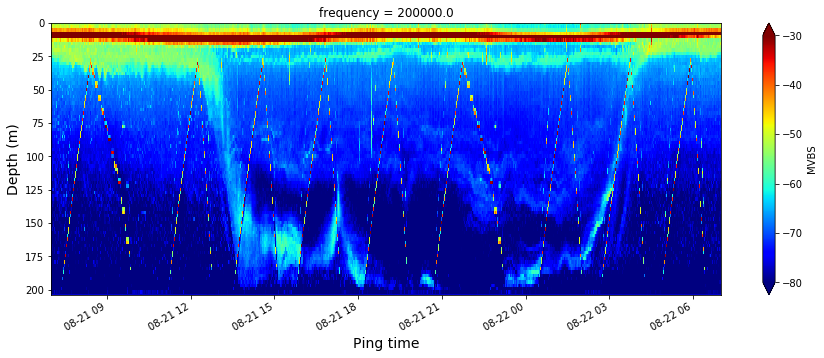

In [33]:
echogram = res.MVBS.sel(frequency=200000).\
            sel(ping_time=slice('2017-08-21 07:00:00',
                                '2017-08-22 07:00:00')).\
            plot(x='ping_time',y='depth',cmap='jet',
                 vmin=-80,vmax=-30,aspect=3, size=5)
plt.ylim(res.coords['depth'].max(), 0)
plt.xlabel('Ping time', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
plt.show()

In [54]:
import numpy as np
import gzip
import requests
import urllib
from datetime import datetime
import pandas as pd
import matplotlib.dates as mdates

In [13]:
srad_url = 'https://www.ndbc.noaa.gov/data/historical/srad/'
filename = '46098'+'r'+'2017'+'.txt.gz'
fileurl = srad_url+filename

In [14]:
f = gzip.open(urllib.request.urlopen(fileurl))

In [15]:
lines = [line.decode().strip() for line in f.readlines()]

In [20]:
lines[:2]

['#YY  MM DD hh mm  SRAD1  SWRAD  LWRAD',
 '#yr  mo dy hr mn   w/m2   w/m2   w/m2']

In [21]:
srad1_time = []
srad1 = []
for line in lines[2:]:
    line = line.split()
    srad1_time.append(datetime.strptime(''.join(line[:5]), '%Y%m%d%H%M'))
    nn = 5  # the 6th column is SRAD1
    srad1.append(np.nan if line[nn] == '9999.0' else float(line[nn]))

In [42]:
# Construct a pandas dataframe for SRAD1 data
df_srad = pd.DataFrame(srad1, columns=['SRAD'], index=srad1_time)

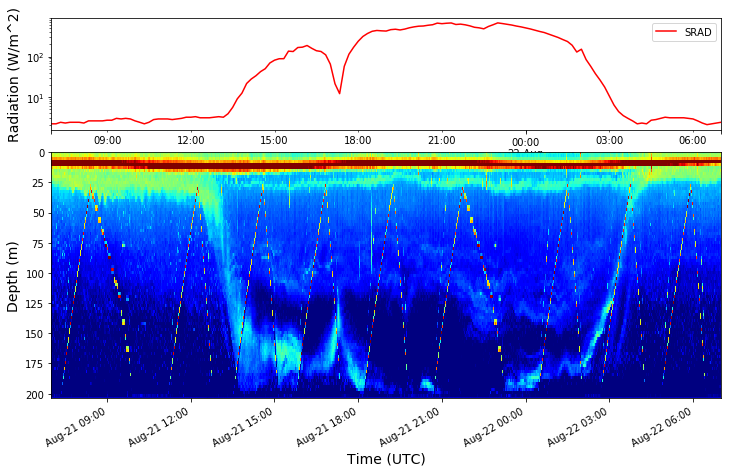

In [84]:
fig = plt.figure(figsize=(12,7))
ax0 = plt.subplot2grid((3, 1), (0, 0))
ax1 = plt.subplot2grid((3, 1), (1, 0),rowspan=2)

df_srad[np.logical_and(df_srad.index>=pd.to_datetime('2017-08-21 07:00:00'), 
                       df_srad.index<=pd.to_datetime('2017-08-22 07:00:00'))].plot(ax=ax0, logy=True, color='r')
ax0.set_ylabel('Radiation (W/m^2)', fontsize=14)

echogram = res.MVBS.sel(frequency=200000).\
            sel(ping_time=slice('2017-08-21 07:00:00',
                                '2017-08-22 07:00:00')).\
            plot(x='ping_time',y='depth',cmap='jet',
                 vmin=-80, vmax=-30, ax=ax1, add_colorbar=False)
plt.ylim(res.coords['depth'].max(), 0)
plt.xlabel('Time (UTC)', fontsize=14)
plt.ylabel('Depth (m)', fontsize=14)
plt.title('')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d %H:%M'))
plt.show()
